# Lab 10: SVM

In [1]:
import pandas as pd
import scipy as sp
import numpy as np
import warnings # current version of seaborn generates a bunch of warnings that we'll ignore
warnings.filterwarnings("ignore")
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

## 0. Data Loading

In [6]:
#load data and extract data
names = ['age', 'workclass', 'fnlwgt', 'edu', 'edu-num', 'maritalstatus', 'occupation', 'relationship', 'race', 'sex','capital-gain','capital-loss','hours-per-week','native-country','income']
df = pd.read_csv('adult.data', names=names)
print( "Total columns: ", len(df.columns))
df.head()                 # display all columns
#df[df.columns[:10]].head() # display the first 10 columns

Total columns:  15


,age,workclass,fnlwgt,edu,edu-num,maritalstatus,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   edu             32561 non-null  object
 4   edu-num         32561 non-null  int64 
 5   maritalstatus   32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [4]:
from sklearn import preprocessing

# it is required that all feature/target values be numerical
# Systematically convert all string (labeled as object) type into labels(1,2,3,...)
label_encoding = preprocessing.LabelEncoder()
for column_name in df.columns:
    if df[column_name].dtype == object:
        df[column_name] = label_encoding.fit_transform(df[column_name])
    else:
        pass

In [5]:
# extract X, y
y = df['income']      # two labels: <=50K, >50K
X = df.drop('income', axis=1)

In [6]:
# Standardize X
X = StandardScaler().fit_transform(X)

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

print('Train/Test sizes:', y_train.shape[0], y_test.shape[0])

Train/Test sizes: 26048 6513


In [8]:
# showing how to use time to record execution time
import time
start_time = time.time()
for i in range(1000):
    for j in range(100):
        for k in range(100):
            sum_v = i+j+k
stop_time = time.time()
print("--- %s seconds ---" % (round(stop_time - start_time, 3)))

--- 1.467 seconds ---


#### Important:  You should NOT modify code above this line, but you should understand how dataset was processed

In [9]:
from sklearn.svm import LinearSVC, SVC
from sklearn.linear_model import SGDClassifier

## 1.  Execution time comparison

### 1.1  SGDClassifier

In [10]:
start_time = time.time()
sgd_svc_clf = SGDClassifier(alpha=0.01, loss='hinge', random_state =42)
sgd_svc_clf.fit(X_train, y_train)

stop_time = time.time()
print(round(accuracy_score(sgd_svc_clf.predict(X_test), y_test), 5),
     round(stop_time - start_time, 3))
#print("--- %s seconds ---" % (round(stop_time - start_time, 3)))

0.8242 0.038


### 1.2. Linear SVC

In [12]:
start_time = time.time()
linear_svc_clf = LinearSVC(C=1, loss='hinge', random_state =42)
linear_svc_clf.fit(X_train, y_train)

stop_time = time.time()

print(round(accuracy_score(linear_svc_clf.predict(X_test), y_test), 5), 
      round(stop_time - start_time, 3))

0.82328 0.361


### 1.3. SVC: Kernel='linear'

In [13]:
start_time = time.time()
svc_linear_clf = SVC(kernel='linear', C=1, random_state =42)
svc_linear_clf.fit(X_train, y_train)

stop_time = time.time()

print(round(accuracy_score(svc_linear_clf.predict(X_test), y_test), 5), 
      round(stop_time - start_time, 3))

0.82358 20.402


### 1. 4. SVC: Kernel='poly'

In [14]:
start_time = time.time()
svc_poly_clf = SVC(kernel='poly', degree=3, C=1, random_state =42)
svc_poly_clf.fit(X_train, y_train)

stop_time = time.time()

print(round(accuracy_score(svc_linear_clf.predict(X_test), y_test), 5), 
      round(stop_time - start_time, 3))

0.82358 16.348


### 1.5. SVC: Kernel='rbf'

In [15]:
start_time = time.time()
svc_rbf_clf = SVC(kernel="rbf", gamma=0.01, C=1, random_state =42)
svc_rbf_clf.fit(X_train, y_train)
accuracy = accuracy_score(svc_rbf_clf.predict(X_test), y_test)
stop_time = time.time()

print( round(accuracy, 5), 
      round(stop_time - start_time, 3))

0.848 22.462


### 1.6. Summary the results in a table

## 2. Hyperparameter C and Gamma

### 2.1 Hyparameter C in SVC: Kernel='rbf'

In [15]:
c_list, c_accuracy_list=[],[]

for C_val in [ 10**x for x in range(-5, 4) ]: 
    start_time = time.time()
    svc_rbf_clf = SVC(kernel="rbf", gamma=0.1, C=C_val, random_state =42)
    svc_rbf_clf.fit(X_train, y_train)
    accuracy = accuracy_score(svc_rbf_clf.predict(X_test), y_test)
    stop_time = time.time()

    c_list.append(C_val)
    c_accuracy_list.append(accuracy)

    print(C_val, 
          round(accuracy, 5), 
          round(stop_time - start_time, 3))

1e-05 0.77169 30.303
0.0001 0.77169 30.553
0.001 0.77169 31.156
0.01 0.81529 31.059
0.1 0.84278 26.822
1 0.84938 27.025
10 0.8503 41.432
100 0.83802 110.839
1000 0.82635 388.165


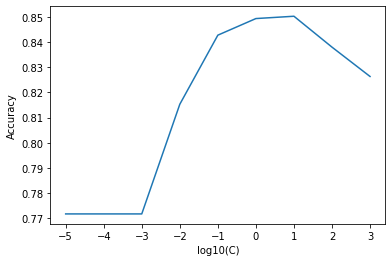

In [41]:
import matplotlib.pyplot as plt

plt.plot(np.log10(c_list), c_accuracy_list)
plt.xlabel('log10(C)')
plt.ylabel('Accuracy')
plt.show()

### 2.2 Hyparameter Gamma in SVC: Kernel='rbf'

In [17]:
gamma_list, g_accuracy_list=[],[]

for gamma in [ 10**x for x in range(-5, 2) ]: 
    start_time = time.time()
    svc_rbf_clf = SVC(kernel="rbf", gamma=gamma, C=0.1, random_state =42)
    svc_rbf_clf.fit(X_train, y_train)
    accuracy = accuracy_score(svc_rbf_clf.predict(X_test), y_test)
    stop_time = time.time()

    gamma_list.append(gamma)
    g_accuracy_list.append(accuracy)

    print(gamma,
          round(accuracy, 5), 
          round(stop_time - start_time, 3))

1e-05 0.77169 30.688
0.0001 0.77169 31.446
0.001 0.78213 31.241
0.01 0.82865 28.406
0.1 0.84278 27.015
1 0.79917 109.155
10 0.77169 144.448


Text(0, 0.5, 'Accuracy')

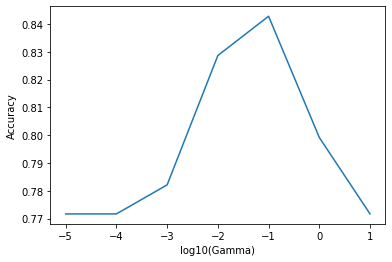

In [42]:
plt.plot(np.log10(gamma_list), g_accuracy_list)
plt.xlabel('log10(Gamma)')
plt.ylabel('Accuracy')